# Projet Python 1A, Héléna Perrier, Lucas Saban


## Part 1 : Creating a model

In [31]:
%run stock_dataset_creator.ipynb

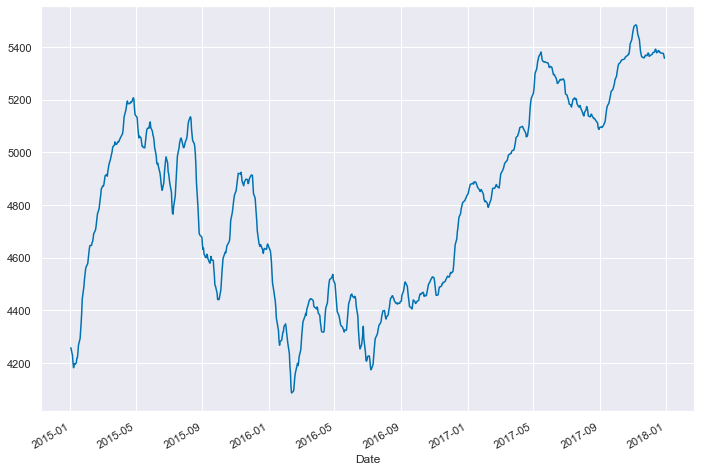

In [32]:
cac40 = stock(name="^FCHI")
cac40.EMA_show("2015","2017")

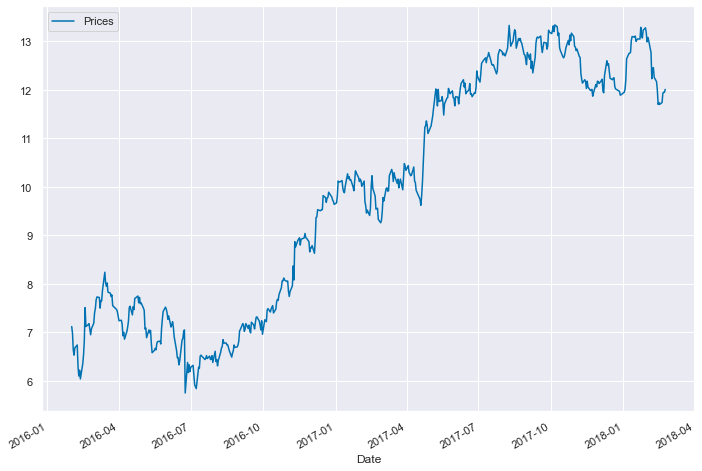

In [26]:
""" This cell is expected to construct the data_set we'll feed our model with"""

stock_ds = stock(name="ACA.PA")

"""Results are not evenly good. ACA.AP is pretty good whereas MSFT is catastrophic

What is left to improve is the choice of the estimator's hyperparamater
such as their quality, the lenght training dataset."""


"""The only indicators taken into account are, for now : 
Relative Strenght Indicator, 
Momentum of Market, 
Bollinger Bands width, 
Rate of Change, 
Prices (not of the forcasted period of course)"""

X = pd.DataFrame({"RSI" : stock_ds.RSI(), 
                  "MOM" : stock_ds.MOM(), 
                  "Bollinger Width" : stock_ds.Bollinger_width(), 
                  "ROC" : stock_ds.ROC(),
                 "Prices" : stock_ds.price()})

y = pd.DataFrame({"Prices" : stock_ds.price()})

X,y = X.dropna(), y.dropna()


assert len(X)!=0, "X dataset is empty bordel"
assert len(y)!= 0, "y dataset is empty bordel"

""""The segmentation of the train/test datasets are arbitrary. 
The forecasting period is expected to be Month+1
We expect to encounter some size issues as markets are not open 365/365 days 
and the closing days are not excatly the same every year"""

X_train = X["2014-01":"2016-01"]
y_train = y["2016-02":"2018-02-25"]


y_train.plot()
plt.show()


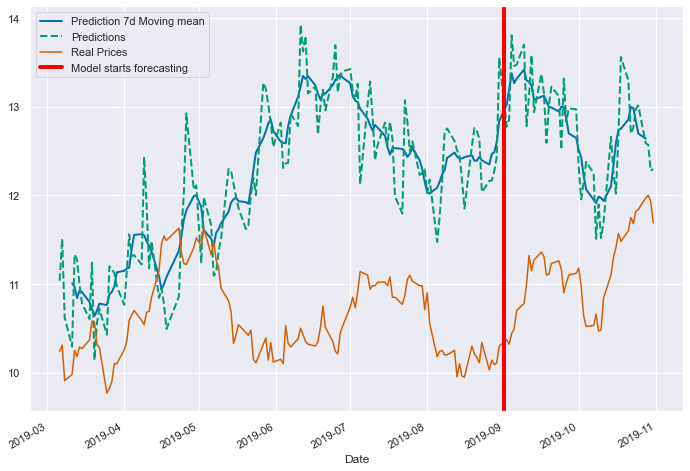

In [27]:
"""def date_comparison(d1, d2):
    n = min(len(d1),len(d2))
    if n <5 : d1_l = [int(d1[:4]), int], d2_l = [int(d1[:4]), int]
    """


X_test_start = "2019-02"
X_test_end = "2019-09"

assert X_test_start < X_test_end

X_test = X[X_test_start:X_test_end]
y_test = y["2019-03-06":"2019-10"]

"""" Below stands a way of dealing with the size issue of training datasets.
It's a degree 0 way of dealing with it. There are certainly more efficient 
ways to handle it"""

if len(y_train)-len(X_train)>0 : y_train= y_train[:-abs(len(y_train)-len(X_train))]
if len(y_train)-len(X_train)<0 : X_train= X_train[:-abs(len(y_train)-len(X_train))]
    

    
"""" The ML model chosen here is SVR because of the architecture of the output.
Chosing a linear Kernel is arbitrary, could be improved"""

from sklearn.svm import SVR
from sklearn import linear_model


def model_inator(model_type="SVR linear"):
    if model_type == "SVR linear" :
        
        return(SVR(kernel="linear"))
        
    elif model_type == "SVR rbf" :
       return(SVR(kernel="rbf"))

    elif model_type == "ridge" :
       return(linear_model.Ridge(alpha=.5))

    elif model_type == "lasso" :
       return(linear_model.Lasso(alpha=.1))

    
    
    
model = model_inator("SVR linear")
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)



""""We have to equalize the size of the test datasets"""

if len(y_test)-len(y_pred)>0 : 
    y_test= y_test[:-abs(len(y_test)-len(y_pred))]
    if len(y_test)-len(y_pred)!=0 : raise ValueError("L'ajustement ne fonctionne pas, y_test est trop long")
if len(y_test)-len(y_pred)<0 : 
    y_pred= y_pred[:-abs(len(y_test)-len(y_pred))]
    if len(y_test)-len(y_pred)!=0 : raise ValueError("L'ajustement ne fonctionne pas, y_pred est trop long")

    
    
"""" Plotting the real prices and the predictions to have a visual assession of 
the quality of our model"""

y_test["Predictions"] = y_pred
y_test["Pred_mean"] = y_test["Predictions"].rolling(window=7, center =True).mean().plot(label="Prediction 7d Moving mean",lw = 2)
y_test["Predictions"].plot(label = "Predictions", ls = "--", lw = 2)
y_test["Prices"].plot(label="Real Prices")

plt.axvline(label = "Model starts forecasting" , x=X_test_end, ymin=0, ymax=190, lw = 4, color = "red")
plt.legend()
plt.show()

## Partie 2 : Evaluating the model